#### Author: Tamene Gelaye<a href="#Author:-Tamene-Gelaye" class="anchor-link">¶</a>

  
Robustness of road network for assessing the resilience of the network

# Robustness<a href="#Robustness" class="anchor-link">¶</a>

The presence of a network system may be from many natural and man-made
systems e.g: Road network systems, Financial Systems, Computer Systems
(like the WWW and the Internet), Biological Systems (the brain, protein
networks, etc.) and Social Systems (e.g., contact networks).
Understanding something about the robustness of these networks, in the
case of when nodes or edges are removed, is important if we want to
engineer or protect these systems.

# Resilience<a href="#Resilience" class="anchor-link">¶</a>

Resilience is the ability of a system to return to its original state or
service and/or function or move to a new desirable state after being
disturbed. The disturbance on the network system can be measured using
robustness measurement by applying attacks and failures. Resilience is
the measure of the availability of those services after apply and
measure those attacks and failures using the robustness measurements.

Further reading:
<http://www.husdal.com/2008/04/28/robustness-flexibility-and-resilience-in-the-supply-chain/>
.

In this study, it was of interest to assess robustness and resilience
while applying random and strategic node attack on the road network. We
will analyse road network in terms of its robustness to *failures* and
*attacks*. We define a *failure* in a network as the *random* removal of
a node (and its connected edges), whereas an *attack* is when we
specifically remove targeted nodes (and their connected edges) based on
some measure (In this study: max eigenvector and max betweenness). The
attacks (or failures) are made one-by-one to the network until we remove
a fraction \$f\$(95%) of all the nodes \$N\$(number of nodes:G.order())
in the road network. We then measure a number of network parameters to
gauge their impact as a function of \$f\$:

1.  \$S_c\$, fraction of remaining nodes in the largest component
2.  \$\<l\>\_c\$, average path length of largest component
3.  \$D_c\$, Diameter of the largest component

Therefore, to fulfill the interest of this study we will try to address
the following research questions:

-   Which road network nodes are sensitive?
-   What will be the robustness of the road network in response to
    random and stratigic attack of sensitive nodes?
-   What will be the resilience response of the network after node
    removal?

  
From this study, the main achievements, including contributions to the
network science field will be to have a general impression of the
current road network robustness and resilience performances of the city,
Addis Ababa, Ethiopia.

In this study we will recreate the experiments of Michael Lees
robustness methdology which is based on the Error and attack tolerance
of complex networks paper by Réka Albert, Hawoong Jeong & Albert-László
Barabási. You can see the paper at
<http://www.nature.com/nature/journal/v406/n6794/full/406378a0.html> For
further reading please refer to Chapter 8 of the free Barabási E-book
(<http://networksciencebook.com/chapter/8>)

## Import required libraries<a href="#Import-required-libraries" class="anchor-link">¶</a>

In \[1\]:

    import networkx as nx #import NetworkX for the network statistics
    import osmnx as ox   # for data downlaoding, drawing, cleaning and manipulating the downlaoded data
    import numpy as np #import numpy for manipulating data structures 
    import pandas as pd # import pandas for manipulating data structures 
    %matplotlib inline   
    #force drawing of graphs inline for ipython notebook
    import matplotlib.pyplot as plt #import matplotlib for plotting/drawing grpahs
    import matplotlib.patches as mpatches #for legends in the graph
    from __future__ import unicode_literals #allow UTF characters in graph labels
    import random # for random choice function
    import copy # this is usful for making deep copies of lists
    from tqdm import tqdm #nice library for progress bars
    import sys #for writing output to stderr
    ox.config(log_file=True, log_console=True, use_cache=True)

  
Important source of imformation for this study:

OpenStreetMap is an initiative to create and provide free geographic
data, such as street maps, to anyone. It encourage the growth,
development and distribution of free geospatial data and to providing
geospatial data for anyone to use and share.  
https://anaconda.org/  
http://jupyter.org/  
https://wiki.osmfoundation.org  
http://www.numpy.org/  
https://github.com/gboeing/osmnx-examples  
https://automating-gis-processes.github.io/2018/  
https://networkx.github.io/documentation/networkx-1.10/overview.html  
https://automating-gis-processes.github.io/CSC18/lessons/L2/geopandas-basics.html  
http://networksciencebook.com/

Download the data

Since the study area is too large to compute the needed metrics we
decided to minimize the size of the study area. To set up our study we
will use a location point and create network only of nodes within 2000m
along the network from point. This creates a bounding box 2000 meters
North, South, East, and West of the point, then constructs the network
from all the OSM nodes and ways within the bounding box. Then it prunes
the network by removing all nodes further than 2000 meters from the
point along the network(if the distance type of the network is
'network').  
By default, the network_type parameter value is 'all', meaning that all
paths types that determine certain types of traffic are included.
Instead (for this project), i specify network_type='drive' to build a
street network only of paths that driving is allowed on. This helps to
get drivable directed network (but not service roads: a subsidiary road
running parallel to a main road and giving access to houses, shops, or
businesses). Thus, the 2000m now takes into account those nodes you can
reach within 2000m while driving in either direction.

In \[2\]:

    location_point = (8.997856,38.765893) # x y coordinate point 
    G = ox.graph_from_point(location_point, distance = 2000, distance_type='network', network_type='drive', simplify = False) # access 
    # the drivable road network data with a 2 km distance to all four direction (north,south, east and west)
    G_projected = ox.project_graph(G) # Re-project the downlaoded data in to WGS84 zone 37 projection 
    fig, ax = ox.plot_graph(G_projected, node_size=5, node_color='none', node_edgecolor='none', node_zorder=2,
                            edge_color='#808080', edge_linewidth=1.5, edge_alpha=1) # draw the downlaoded graph using the osmnx graph 
                            # tool

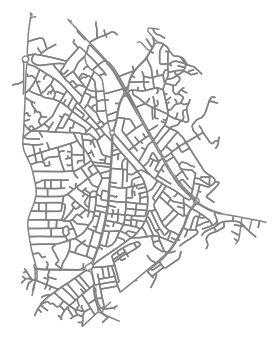

# Data cleaning<a href="#Data-cleaning" class="anchor-link">¶</a>

### 1. Remove self loops and Identify and remove nodes from edges<a href="#1.-Remove-self-loops-and-Identify-and-remove-nodes-from-edges"
class="anchor-link">¶</a>

Doing so will remove those self loop edges which does not make any
contrbution for calculating centrality metrics. So, in this network
robutsness and resilience analysis we need to remove those edges. Open
street map road network data has a lot of nodes over edges which is not
actually a node (intersection point). Thus, we need to remove those node
from the network.

In \[3\]:

    # Remove self loop edges from the graph
    #loops = [edge[0] for edge in G2.selfloop_edges()]
    #nc = ['m' if node in loops else 'b' for node in G2.nodes()]
    G_projected.remove_edges_from(G_projected.selfloop_edges())
    # show which nodes we'd remove if we simplify it
    nc = ['b' if ox.is_endpoint(G_projected, node) else 'r' for node in G.nodes()] # give a specific color for nodes on the edge
    fig, ax = ox.plot_graph(G_projected, node_color=nc, node_zorder=3) # plot the graph 

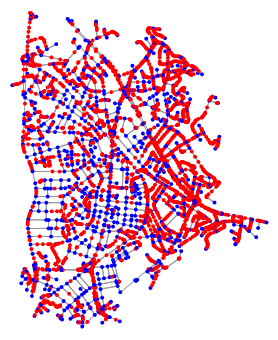

Those red color nodes are located on the edge which is node needed for
our compuatation. Thus, we need to remove those points from the network.
**Let's** see the number of nodes in the orginal graph. this will help
us to compare how many nodes are removed by this simplification.

In \[4\]:

    G_projected.number_of_nodes()

Out\[4\]:

    3531

As we can see, there are **3531** nodes on the whole network

In \[5\]:

    G_simplified = G_projected.copy() # copy the origional data for simplification  
    G_simplified = ox.simplify_graph(G_simplified) # simply or remove extra nodes from edges 
    fig, ax = ox.plot_graph(G_simplified,node_color='none', node_edgecolor='none', node_zorder=2) # plot the simplified network

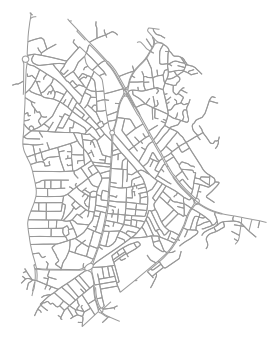

In \[6\]:

    G_simplified.number_of_nodes()

Out\[6\]:

    924

Now, we can see that the change in number of node from this
simplification is in high number. **73.83%** (3531 -924/3531\*100) of
the node from the orginal network were removed.

### 2. Unify and clean-up intersections of divided roads<a href="#2.-Unify-and-clean-up-intersections-of-divided-roads"
class="anchor-link">¶</a>

Divided roads are represented by separate centerline edges and represent
a single intersection in the real world. The intersection of two divided
roads where each edge intersects a perpendicular edge thus creates 4
nodes. Roundabouts similarly create a cluster of intersections where
each edge connects to the roundabout. This function cleans up these
clusters by buffering their points to an arbitrary distance, merging
overlapping buffers, and returning a GeoSeries of their centroids. For
the study, Even if there no too much roundabouts in the study area but
the edges connected to the roundabouts will not have more than 15 meters
distance between each other. Thus, we will consider those intersection
points as part of the same intersection. We'll also specify that we
remove dead-ends from the network. these cleaned up intersections will
us to give a more accurate intersection counts and densities.

In \[7\]:

    intersections = ox.clean_intersections(G_simplified, tolerance=15, dead_ends=False) # clean up the intersections and extract their xy coords
    points = np.array([point.xy for point in intersections]) # locat points after the intersections removed

In \[8\]:

    # plot the cleaned-up intersections
    fig, ax = ox.plot_graph(G_simplified, fig_height=10, show=False, close=False, node_alpha=0)
    ax.scatter(x=points[:,0], y=points[:,1], zorder=2, color='#66ccff', edgecolors='k') # adding points on the graph
    plt.show()  # plot the graph

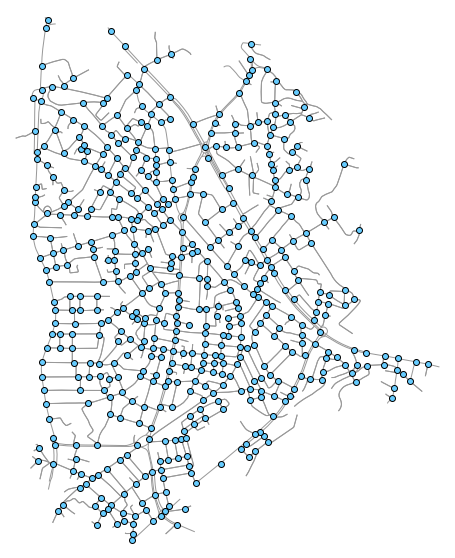

In \[9\]:

    G1 = nx.to_undirected(G_simplified)

In \[10\]:

    G= nx.Graph(G1)

## calculate route<a href="#calculate-route" class="anchor-link">¶</a>

In \[16\]:

    route= copy.deepcopy(G1) # copy the orgional network for furhter processing

In \[20\]:

    nodes, edges = ox.graph_to_gdfs(route, nodes = True, edges = True) # access the edges from the network to route 
    area = edges.unary_union.convex_hull.area # calculate the area of the network
    cenroid = edges.unary_union.convex_hull.centroid # calculate the centroid of the network for x and y coordinates as origion location
    nodes['x'] = nodes['x'].astype(float) # change x coordinates in to decimal points
    nodes['y'] = nodes['y'].astype(float) # change y coordinates in to decimal points
    nodes.head() # checking the correctness of the decimal x and y points

Out\[20\]:

|            | highway | lat     | lon     | osmid      | x             | y             | geometry                                    |
|------------|---------|---------|---------|------------|---------------|---------------|---------------------------------------------|
| 1110769667 | NaN     | 8.98754 | 38.7599 | 1110769667 | 473613.105275 | 993483.657432 | POINT (473613.1052747506 993483.6574322612) |
| 2125185039 | NaN     | 9.00441 | 38.7682 | 2125185039 | 474521.223575 | 995347.712997 | POINT (474521.223574929 995347.712997121)   |
| 2125185042 | NaN     | 9.00438 | 38.7732 | 2125185042 | 475070.063639 | 995344.140908 | POINT (475070.0636393552 995344.1409083039) |
| 2125185049 | NaN     | 9.00447 | 38.7679 | 2125185049 | 474485.582981 | 995354.612298 | POINT (474485.582981487 995354.6122982415)  |
| 271900700  | NaN     | 9.00995 | 38.7637 | 271900700  | 474030.119061 | 995961.127479 | POINT (474030.1190612928 995961.1274786608) |

## Experiment Design<a href="#Experiment-Design" class="anchor-link">¶</a>

we will test the robustness of the road against Erdős-Rényi(er) random
network and Barabási-Albert(ba) scale free network.This is beacuse there
is no clear distiniction between the two catagoises in which the road
network is catagorized in to.

### Experiment parameters<a href="#Experiment-parameters" class="anchor-link">¶</a>

Now we will generate a number of different networks using the in built
NetworkX methods. Each of these network generators has a number of
parameters (including network size), we will vary these somewhat to test
their impact. However, it's advisable avoid doing networks which are
very large as this will take too much time.

Below are the parametes we will use to create the artificial networks
(for the experiments) and other experimental parameters. Change these if
you want to run with different network configurations

In \[11\]:

    NetworkSize = G.order() #network size to use in experiments
    ba_m = [3] #list of m values to use, m indicate the number of new edges to add for every new node added in the BA model
    p_values = [0.008] #p values to use for ER networks, p indicates probability of making an edge
    repetitions = 1 #For each of the parameter settings above, how many unqiue graphs do we want to generate.

    fraction_of_nodes_to_remove = 0.95 # remove until this fraction of all original nodes are removed
    num_removals = int(fraction_of_nodes_to_remove * NetworkSize) #number of nodes to remove

### Create the artificial networks<a href="#Create-the-artificial-networks" class="anchor-link">¶</a>

Below we create our artificial networks and store them in two lists. We
also make a deep copy, so we can re-use them whenever necessary. Don't
forget, the experiments will actually destroy the networks by removing
nodes, so in case we want to run the fail on *exactly* the same network
as the attacks, we need to have a copy to work with.

In \[12\]:

    ba_networks = [] # nx.barabasi_albert_graph(G_simplified.nodes(), 3)list to store BA networks,
    er_networks = [] # nx.erdos_renyi_graph(G_simplified.nodes(), 0.08)list to store ER networks,
        
    for m in ba_m: #create BA networks
        for r in range(repetitions):
            ba_networks.append(nx.barabasi_albert_graph(NetworkSize, m, r))

    for p in p_values: #create ER networks
        for r in range(repetitions):
            er_networks.append(nx.erdos_renyi_graph(NetworkSize, p, r))
        
    orig_er_networks = copy.deepcopy(er_networks) # make copies of the network lists a deep copy will copy the list and the items inside.
    orig_ba_networks = copy.deepcopy(ba_networks)

## Measuring Original Network statistics<a href="#Measuring-Original-Network-statistics"
class="anchor-link">¶</a>

We now have some BA networks and some ER networks that we can analyse,
we will measure the diameter \$D\$, the average path length \$\<l\>\$
and the fraction of nodes in the giant component (although this will be
1.0 initially for the BA networks)

First we get all metrics for the BA networks, you'll notice the diameter
is typically the same, and the average path length varies a little.

To make this more effecient we create a few functions. First we make a
function that calculates the diameter and average path length at the
same time (this is more effecient than doing both separately).

We then have a function for collecting the statistics in a single graph,
then another function for collecting statistics from a list of graphs.

In \[13\]:

    def diameter_ave_path_length(G):
        # We create our own function to do this so things are slightly faster, 
        # we can calculate diameter and avg path length at the same time
        max_path_length = 0
        total = 0.0
        for n in G: #iterate over all nodes
            path_length=nx.single_source_shortest_path_length(G, n) # generate shortest paths from node n to all others
            total += sum(path_length.values()) #total of all shortest paths from n
            if max(path_length.values()) > max_path_length: #keep track of longest shortest path we see.
                max_path_length = max(path_length.values())         
        try:
            avg_path_length = total / (G.order()*(G.order() - 1))
        except ZeroDivisionError:
            avg_path_length = 0.0
        return max_path_length, avg_path_length

    def all_network_statistics(nw_list): 
        # a function that takes in a list of networks and returns 3 lists of same length listing the diameter, average 
        # path length and giant component size for all the networks
        diameters = []
        path_lengths = []
        S = []
        for n in nw_list:
            d,l,s = a_network_statistics(n)
            diameters.append(d)
            path_lengths.append(l)
            S.append(s)
        return (diameters, path_lengths, S)

    def a_network_statistics(n):
        
        Gcc=sorted(nx.connected_component_subgraphs(n), key = len, reverse=True)
        G0=Gcc[0]
        d,l = diameter_ave_path_length(G0)
        s = float(G0.order()) / float(NetworkSize)
        return d,l,s

    print(all_network_statistics(ba_networks)) #calculate and print all statistics of the BA networks.

    ([6], [3.423944600000938], [1.0])

Now we will do the same thing for the ER networks, notice that the value
of p=0.08 was selected to create networks with approximately the same
average path length as the BA model with m=3. From analytical results we
know that \$\$\<l\>\_{ER} = \frac{\ln(N)}{\ln(N \times p)}\$\$

In \[14\]:

    print(all_network_statistics(er_networks))

    ([7], [3.612917598833092], [1.0])

## Defining attack and fail functions<a href="#Defining-attack-and-fail-functions" class="anchor-link">¶</a>

We now use network functionalities to calculate metrics and define 3
functions that we can use to remove nodes, either attack or failures. We
will use these functions repeatedly to affect the network.

In \[15\]:

    ## Declaring a function whcih computs centrality measures, attacks and failure 
    def fail(G): #a python function that will remove a random node from the graph G
       # n = dict(random.choice(G.nodes()))  #pick a random node
        n = random.choice(list(G.nodes()))  #pick a random node\n",
        G.remove_node(n) # remove that random node, attached edges automatically removed.
        
    def attack_eigenvector(G): #remove node with maximum eigenvector centrality measure
        eigenvector = nx.eigenvector_centrality_numpy(G) # compute eigenvector using networkx package
        eigenvector = dict(nx.eigenvector_centrality_numpy(G)) # get dcitonary where key is node id, value is eigenvector
        max_eigenvector = max(eigenvector.values()) # find maximum eigenvector value from all nodes and peak the maximum one
        max_keys = [k for k,v in eigenvector.items() if v==max_eigenvector] #get all nodes who have the maximum eigenvector (may be more than one)
        G.remove_node(max_keys[0]) #remove just the first node with max_eigenvector, we will remove others next
        
    def attack_betweenness(G): # remove node with maximum betweenness centrality measure
        betweenness = nx.betweenness_centrality(G) # compute betweenness centrality using networkx package 
        betweenness = dict(nx.betweenness_centrality(G)) # get dictionary where key is node id and value is betweenness centrality\n",
        max_betweenenss = max(betweenness.values()) # find maximum degree value from all nodes
        max_keys = [k for k,v in betweenness.items() if v == max_betweenenss] #get all nodes who have the maximum degree (may be more than one)\n",
        G.remove_node(max_keys[0]) #remove just the first node with max degree, we will remove others next

## Failures<a href="#Failures" class="anchor-link">¶</a>

Now we will gradually fail our Network using the Lees methodology. This
method help us to remove nodes based on the centrality measurement
values till the specified fraction of node remain.

Note that these calculations take a significant amount of time, because
after each failure, and for each network we measure the diameter and
average path length.

In \[16\]:

    # This is needed if we just want to rerun this cell and not have to create the networks again after we destroy them
    er_networks = copy.deepcopy(orig_er_networks)
    ba_networks = copy.deepcopy(orig_ba_networks)


    def experiments(networks, removals, run_fail=True, measure_every_X_removals=20):
        # the below list will record the average statistic for all networks, a new entry in the list is added after each fail
        ave_diameters = []
        ave_path_lengths = []
        ave_S = []
        sys.stderr.write("---- Starting Experiments ---- ")
        sys.stderr.flush()
        for x in tqdm(range(removals)):                    
            for n in networks:
                if run_fail:
                    fail(n)
                else:
                    attack_betweenness(n)
            if x % measure_every_X_removals == 0:            
                d, l, s = all_network_statistics(networks)
                ave_diameters.append(np.mean(d))
                ave_path_lengths.append(np.mean(l))
                ave_S.append(np.mean(s))
        sys.stderr.write("---- Experiments Finished ---- \n")
        sys.stderr.flush()
        return ave_diameters, ave_path_lengths, ave_S
                    
    er_ave_diameters, er_ave_path_lengths, er_ave_S = experiments(er_networks, num_removals)
    ba_ave_diameters, ba_ave_path_lengths, ba_ave_S = experiments(ba_networks, num_removals)

    print("\n ----All Experiments Finisheds ---- \n")

    100%|██████████| 877/877 [01:24<00:00, 10.40it/s] 
    ---- Experiments Finished ---- 
    100%|██████████| 877/877 [01:12<00:00, 12.10it/s] 
    ---- Experiments Finished ---- 

     ----All Experiments Finisheds ---- 

## Plotting Failure<a href="#Plotting-Failure" class="anchor-link">¶</a>

Below we plot the results from the failure experiments above.

In \[17\]:

    #plotting stuff...
    xvalues = [(float(x)/float(NetworkSize)) * 20 for x in range(len(er_ave_diameters))]
    fig_size= [18,13]
    plt.rcParams.update({'font.size': 20, "figure.figsize": fig_size})

    # Plot diameter
    plt.plot(xvalues, er_ave_diameters, '--or', xvalues, ba_ave_diameters, '--xb')
    red_patch = mpatches.Patch(color='red', label='ER')
    blue_patch = mpatches.Patch(color='blue', label='BA')
    plt.legend(handles=[red_patch, blue_patch])
    plt.xlabel('f')
    plt.ylabel('diameter')
    plt.title('Failures on Erdös-Reynéi & Barabási-Albert Networks size ' + str(NetworkSize))
    plt.show()

    # Plot average path length
    plt.plot(xvalues, er_ave_path_lengths, '--or', xvalues, ba_ave_path_lengths, '--xb')
    red_patch = mpatches.Patch(color='red', label='ER')
    blue_patch = mpatches.Patch(color='blue', label='BA')
    plt.legend(handles=[red_patch, blue_patch])
    plt.xlabel('f')
    plt.ylabel('<l>')
    plt.title('Failures on Erdös-Reynéi & Barabási-Albert Networks size ' + str(NetworkSize))
    plt.show()

    # Plot fraction of nodes in giant component
    plt.plot(xvalues, er_ave_S, '--or', xvalues, ba_ave_S, '--xb')
    red_patch = mpatches.Patch(color='red', label='ER')
    blue_patch = mpatches.Patch(color='blue', label='BA')
    plt.legend(handles=[red_patch, blue_patch])
    plt.xlabel('f')
    plt.ylabel('S')
    plt.title('Failures on Erdös-Reynéi & Barabási-Albert Networks size ' + str(NetworkSize))
    plt.show()

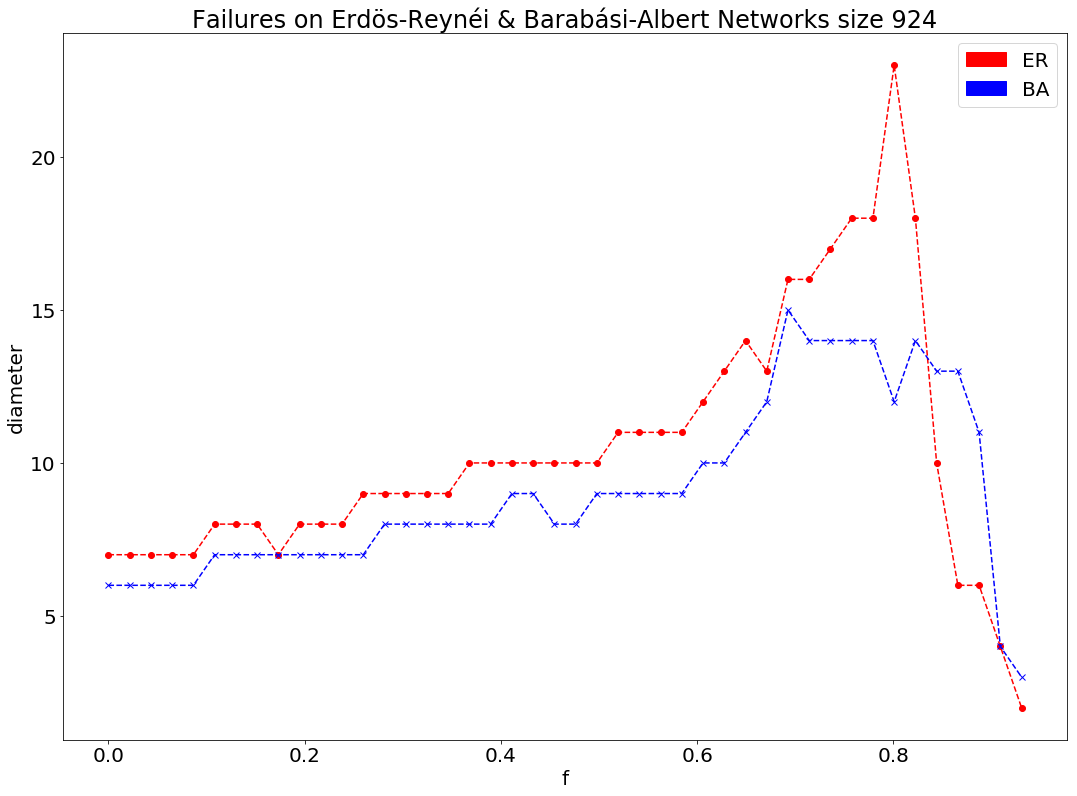

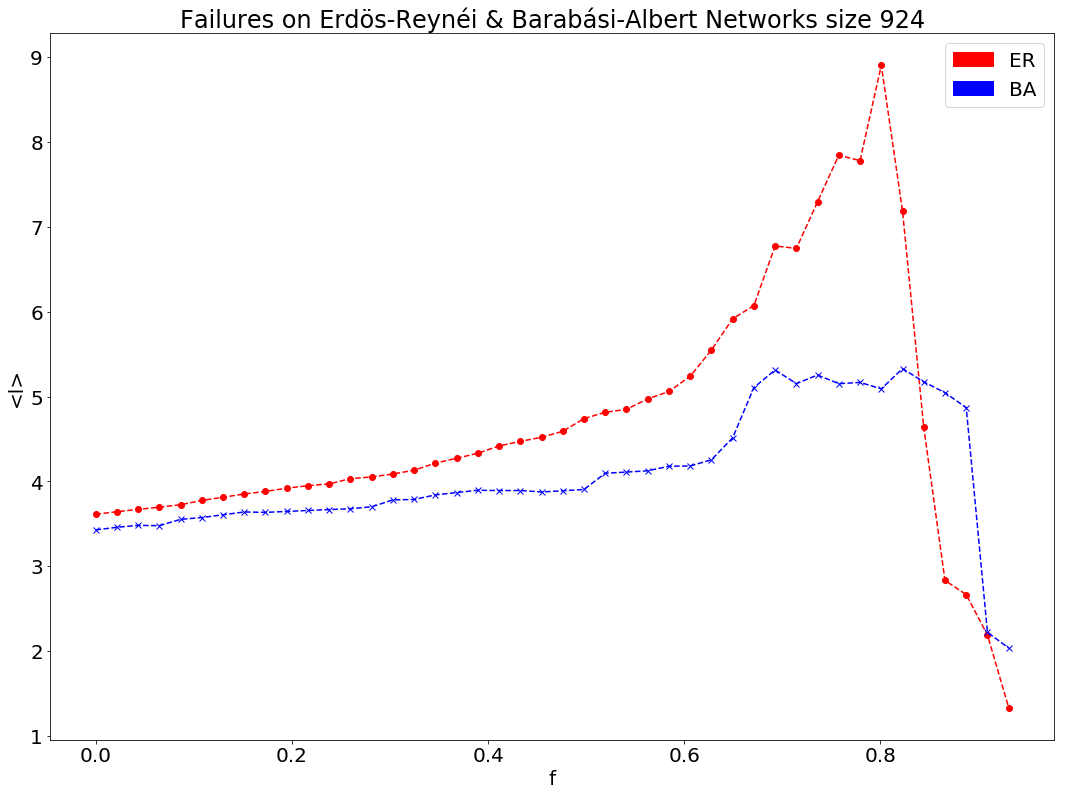

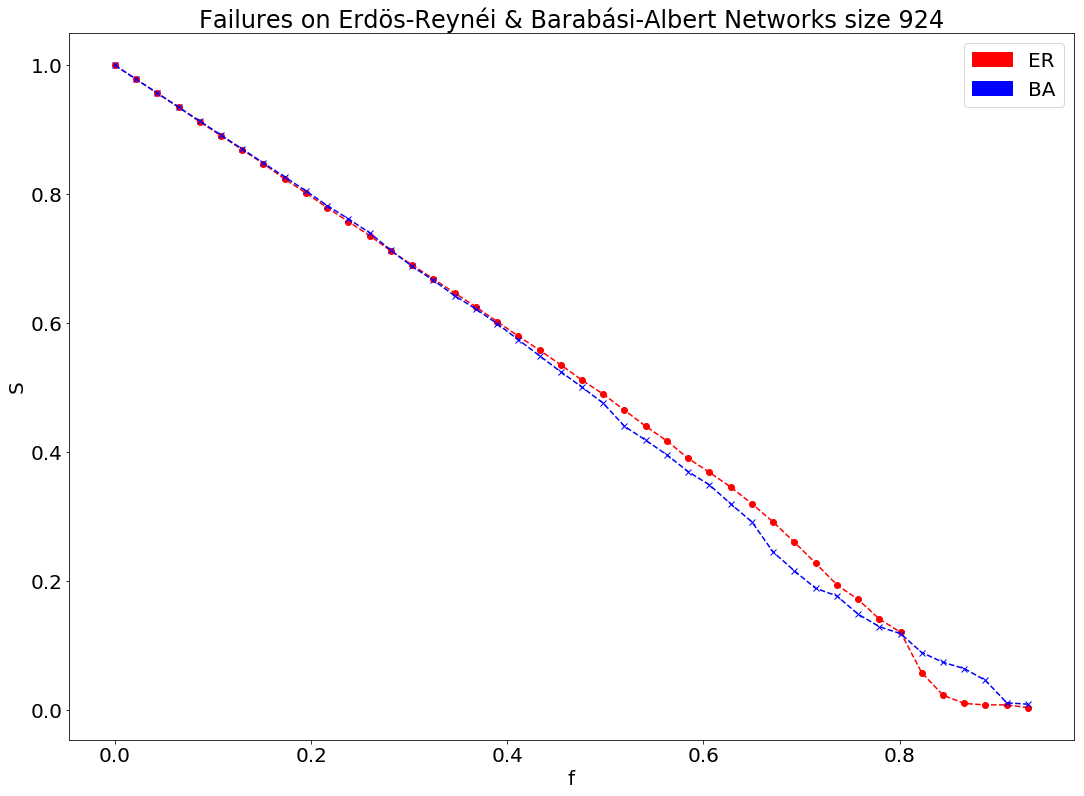

## Attack Experiments<a href="#Attack-Experiments" class="anchor-link">¶</a>

Now we will run degree-based attacks on the networks, where we remove
the nodes with the highest degree first

In \[18\]:

    # This is needed if we just want to rerun this cell and not have to create the networks again after we destroy them
    er_networks = copy.deepcopy(orig_er_networks)
    ba_networks = copy.deepcopy(orig_ba_networks)

    er_ave_diameters, er_ave_path_lengths, er_ave_S = experiments(er_networks, num_removals, run_fail=False)
    ba_ave_diameters, ba_ave_path_lengths, ba_ave_S = experiments(ba_networks, num_removals, run_fail=False)
            
    print ("--Experiments Finished--")

    100%|██████████| 877/877 [1:02:42<00:00,  4.29s/it]
    ---- Experiments Finished ---- 
    100%|██████████| 877/877 [31:20<00:00,  2.14s/it]  
    ---- Experiments Finished ---- 

    --Experiments Finished--

## Plotting attacks<a href="#Plotting-attacks" class="anchor-link">¶</a>

Now we plot graphs showing the attacks on both networks

In \[38\]:

    #plotting stuff...
    xvalues = [(float(x)/float(NetworkSize)) * 20 for x in range(len(er_ave_diameters))]
    fig_size= [18,13]
    plt.rcParams.update({'font.size': 20, "figure.figsize": fig_size})

    # Plot diameter
    plt.plot(xvalues, er_ave_diameters, '--or', xvalues, ba_ave_diameters, '--xb')
    plt.xlabel('f')
    plt.ylabel('diameter')
    plt.title('Attacks on Erdös-Reynéi & Barabási-Albert Networks size ' + str(NetworkSize))
    red_patch = mpatches.Patch(color='red', label='ER')
    blue_patch = mpatches.Patch(color='blue', label='BA')
    plt.legend(handles=[red_patch, blue_patch])
    plt.show()

    # Plot average path length
    plt.plot(xvalues, er_ave_path_lengths, '--or', xvalues, ba_ave_path_lengths, '--xb')
    red_patch = mpatches.Patch(color='red', label='ER')
    blue_patch = mpatches.Patch(color='blue', label='BA')
    plt.legend(handles=[red_patch, blue_patch])
    plt.xlabel('f')
    plt.ylabel('<l>')
    plt.title('Attacks on Erdös-Reynéi & Barabási-Albert Networks size ' + str(NetworkSize))
    plt.show()

    # Plot fraction of nodes in giant component
    plt.plot(xvalues, er_ave_S, '--or', xvalues, ba_ave_S, '--xb')
    red_patch = mpatches.Patch(color='red', label='ER')
    blue_patch = mpatches.Patch(color='blue', label='BA')
    plt.legend(handles=[red_patch, blue_patch])
    plt.xlabel('f')
    plt.ylabel('S')
    plt.title('Attacks on Erdös-Reynéi & Barabási-Albert Networks size ' + str(NetworkSize))
    plt.show()

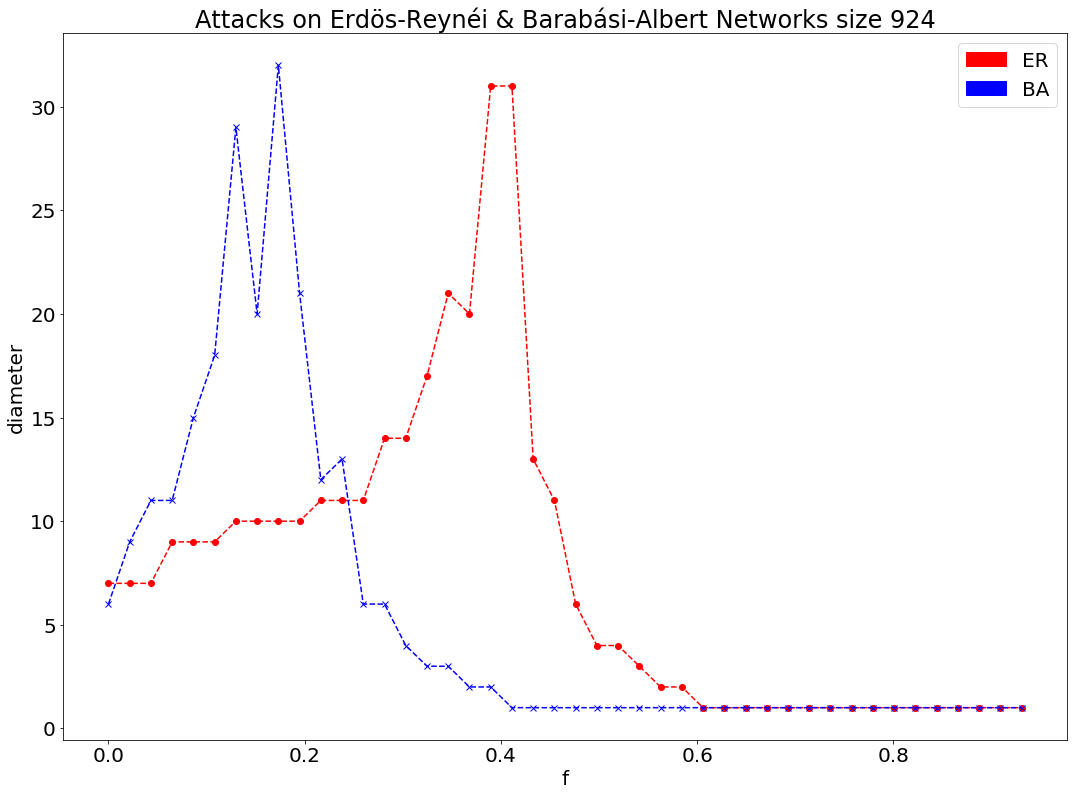

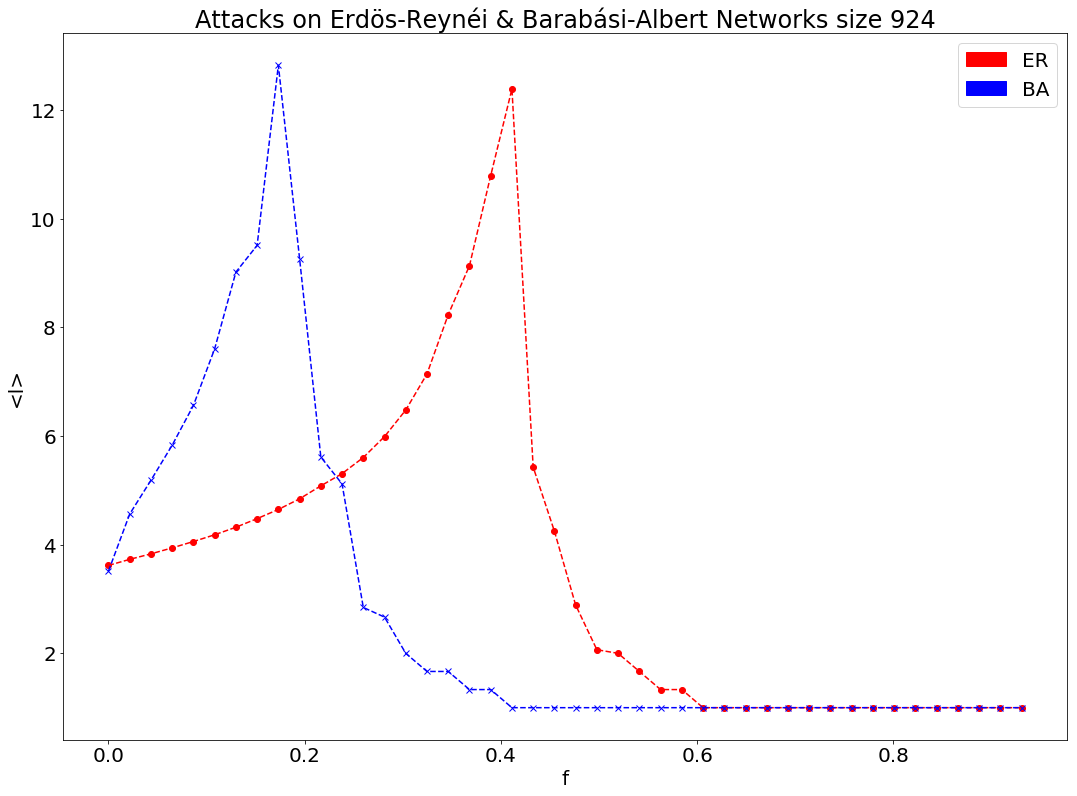

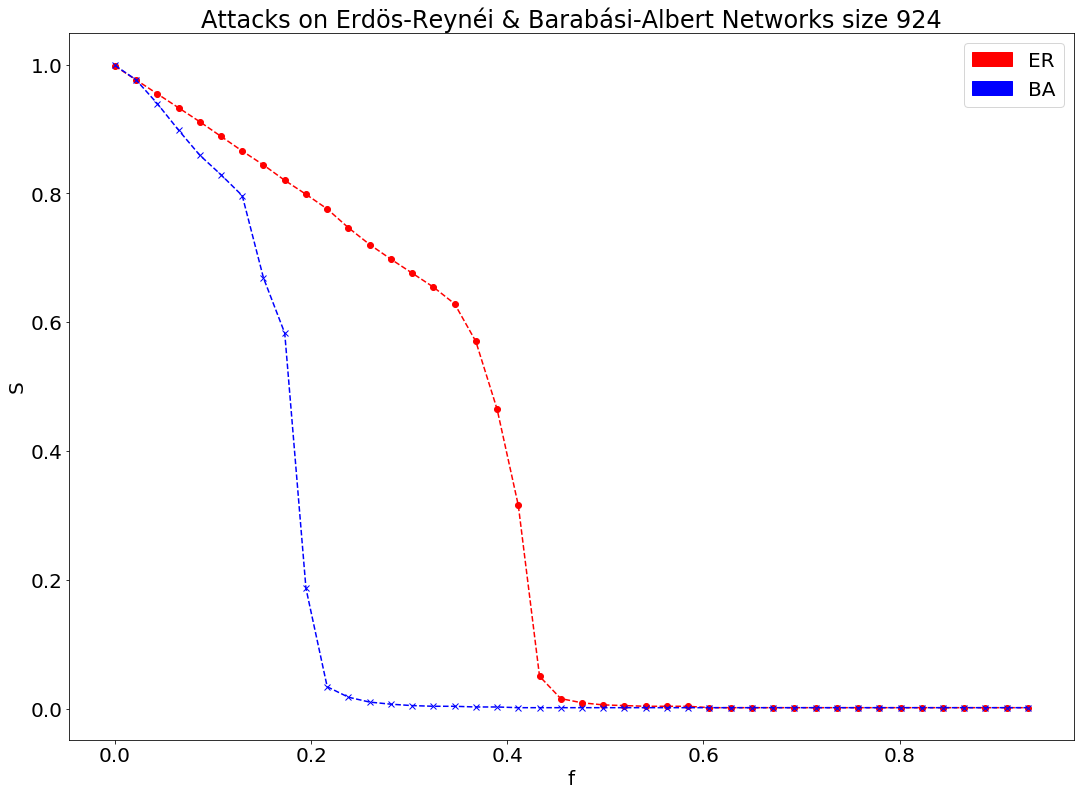

## Road Network<a href="#Road-Network" class="anchor-link">¶</a>

Now we can do the same experiments with the road Network. We will ignore
edge direction in this case, as direction can complicate the component
definitions. This may take some time as the road network is large has
over too many nodes and edges.

In \[39\]:

    #with open('edgelist.csv', 'rb') as file_handle:
      #  next(file_handle, '')   # skip the header line (NOTE the first list in the CSV file doesn't contain an edge)
       # G = nx.read_edgelist(file_handle, delimiter=',',
                            # nodetype=str, data=(('weight', float),), encoding="utf-8")
    G_c = G.copy()
    NetworkSize = G.order()
    # Attack 
    anf_ave_diameters, anf_ave_path_lengths, anf_ave_S = experiments([G], int(NetworkSize * 0.8), run_fail=True, measure_every_X_removals=200)
    # failure 
    ana_ave_diameters, ana_ave_path_lengths, ana_ave_S = experiments([G_c], int(NetworkSize * 0.8), run_fail=False, measure_every_X_removals=200)

    100%|██████████| 739/739 [00:10<00:00, 67.97it/s]
    ---- Experiments Finished ---- 
    100%|██████████| 739/739 [16:30<00:00,  1.34s/it] 
    ---- Experiments Finished ---- 

## Plotting road Network<a href="#Plotting-road-Network" class="anchor-link">¶</a>

Now we plot the result of the attacks and failures on the road network.
You'll see something interesting regarding the average path length and
we will try to think about some consequences of this finding.

In \[40\]:

    fig_size= [18,13]
    plt.rcParams.update({'font.size': 20, "figure.figsize": fig_size})
    xvalues = [(float(x)/float(NetworkSize)) * 200 for x in range(len(anf_ave_diameters))]

    # Plot diameter
    plt.plot(xvalues, anf_ave_diameters, '--or', xvalues, ana_ave_diameters, '--xb')
    plt.xlabel('f')
    plt.ylabel('diameter')
    plt.title('Attacks & Failures on Airline Network Networks size')
    red_patch = mpatches.Patch(color='red', label='Failures')
    blue_patch = mpatches.Patch(color='blue', label='Attacks')
    plt.legend(handles=[red_patch, blue_patch])
    plt.show()

    # Plot average path length
    plt.plot(xvalues, anf_ave_path_lengths, '--or', xvalues, ana_ave_path_lengths, '--xb')
    red_patch = mpatches.Patch(color='red', label='Failures')
    blue_patch = mpatches.Patch(color='blue', label='Attacks')
    plt.legend(handles=[red_patch, blue_patch])
    plt.xlabel('f')
    plt.ylabel('<l>')
    plt.title('Attacks & Failures on Airline Network Networks size')
    plt.show()

    # Plot fraction of nodes in giant component
    plt.plot(xvalues, anf_ave_S, '--or', xvalues, ana_ave_S, '--xb')
    red_patch = mpatches.Patch(color='red', label='Failures')
    blue_patch = mpatches.Patch(color='blue', label='Attacks')
    plt.legend(handles=[red_patch, blue_patch])
    plt.xlabel('f')
    plt.ylabel('S')
    plt.title('Attacks & Failures on Airline Network Networks size')
    plt.show()    

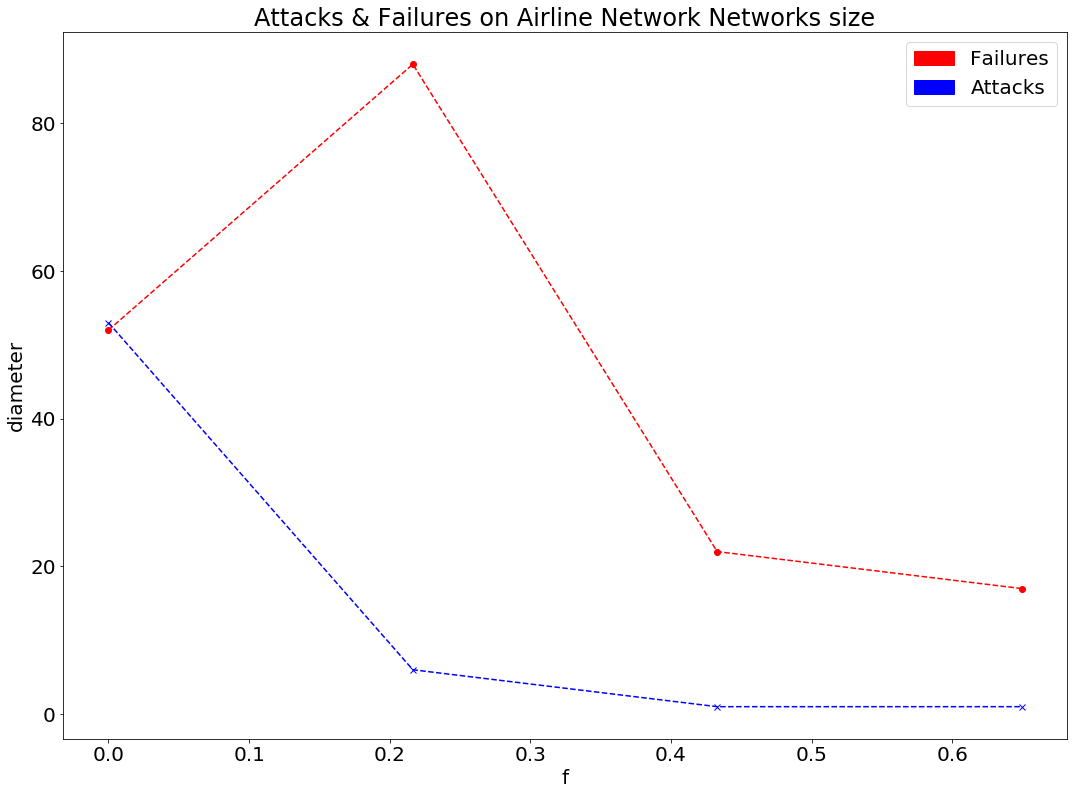

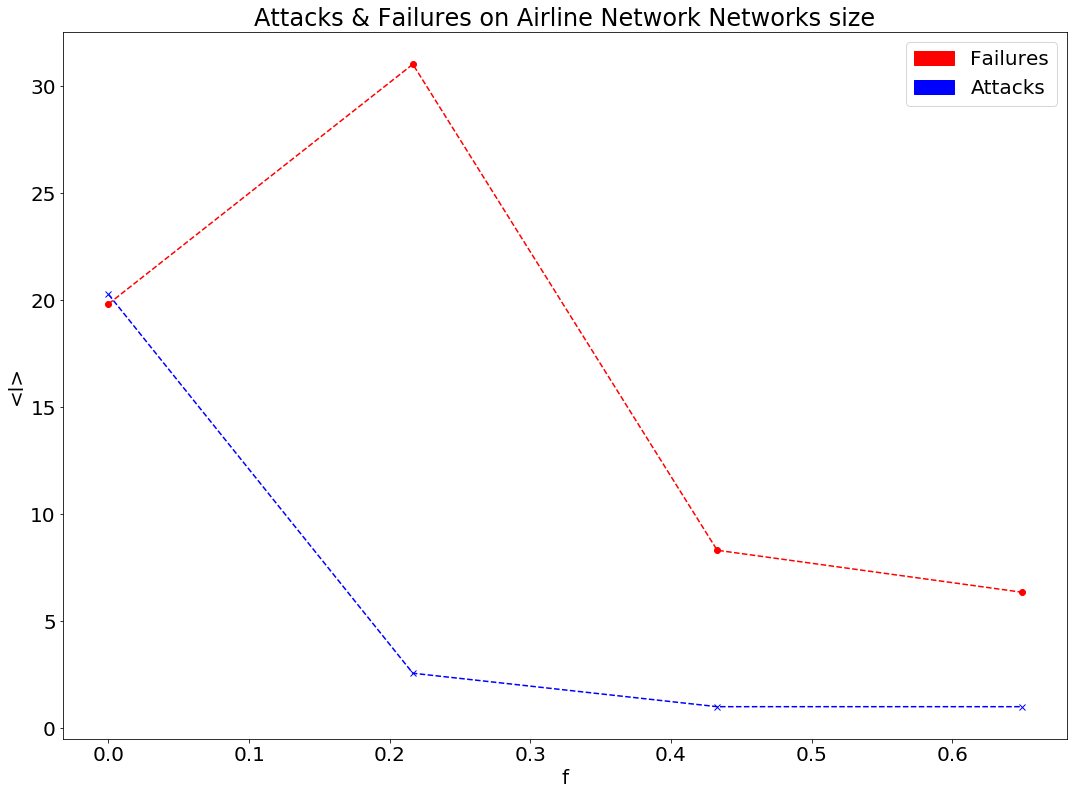

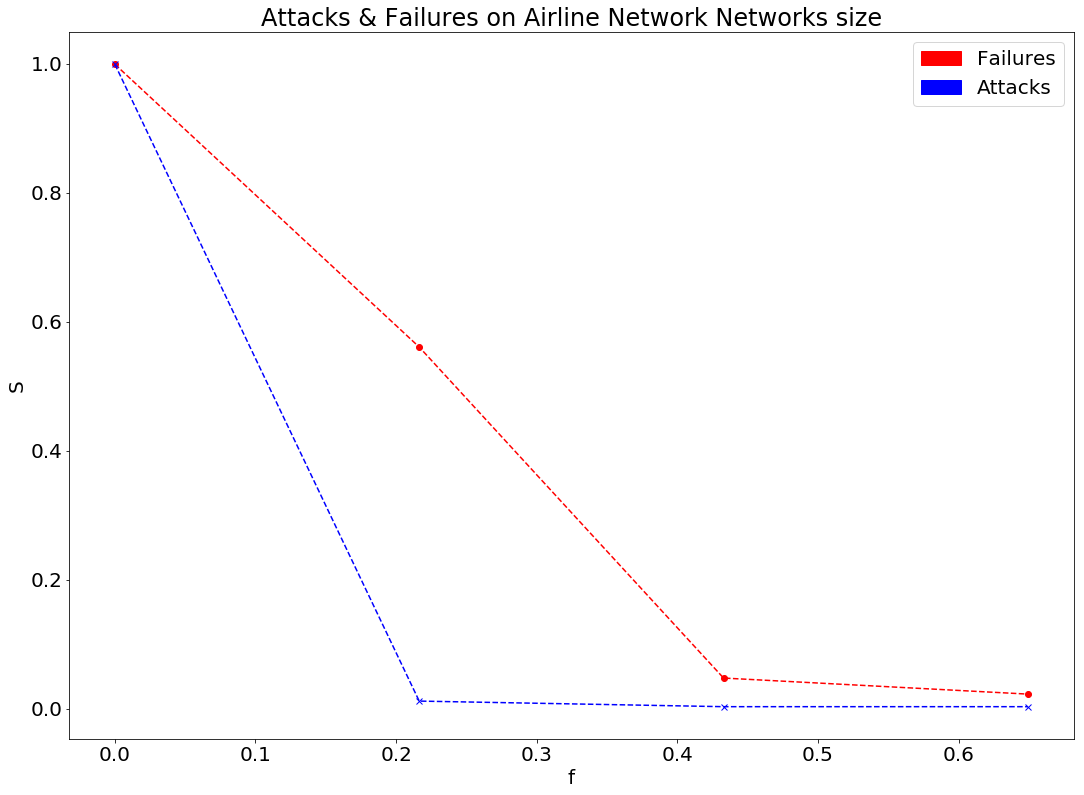

## Resilence<a href="#Resilence" class="anchor-link">¶</a>

## Routing<a href="#Routing" class="anchor-link">¶</a>

## Analyzing the network properties<a href="#Analyzing-the-network-properties" class="anchor-link">¶</a>

In \[19\]:

    graph_stats = ox.basic_stats(G_simplified)

calculate the coverge area of the graph in order to calculate the
missing information of the graph

In \[20\]:

    graph_area= ox.graph_to_gdfs(G_simplified,nodes =False,edges= True)

In \[21\]:

    area_graph= graph_area.unary_union.convex_hull.area

In \[22\]:

    area_graph

Out\[22\]:

    6114089.337898732

The area of the road network under study is 6114089.337898732 sq.m

In \[23\]:

    stats = ox.basic_stats(G_simplified,area =area_graph)

In \[24\]:

    # Analyzing Extended stats
    extended_stats = ox.extended_stats(G_simplified, bc = True, ecc= True,cc= True)

In \[25\]:

    for key,value in extended_stats.items():
        extended_stats[key]=value
    pd_stats= pd.Series(extended_stats)
    pd_stats

Out\[25\]:

    avg_neighbor_degree                    {1110769667: 2.0, 2125185039: 2.0, 2125185042:...
    avg_neighbor_degree_avg                                                          2.59253
    avg_weighted_neighbor_degree           {1110769667: 0.02850383376564148, 2125185039: ...
    avg_weighted_neighbor_degree_avg                                               0.0445991
    degree_centrality                      {1110769667: 0.004333694474539545, 2125185039:...
    degree_centrality_avg                                                         0.00508177
    clustering_coefficient                 {1110769667: 0, 2125185039: 0, 2125185042: 0, ...
    clustering_coefficient_avg                                                     0.0239899
    clustering_coefficient_weighted        {1110769667: 0, 2125185039: 0, 2125185042: 0, ...
    clustering_coefficient_weighted_avg                                           0.00278446
    pagerank                               {1110769667: 0.0006393795043123391, 2125185039...
    pagerank_max_node                                                              548238426
    pagerank_max                                                                  0.00281234
    pagerank_min_node                                                             4883681424
    pagerank_min                                                                 0.000206614
    eccentricity                           {1110769667: 3428.7450000000013, 5456801795: 3...
    diameter                                                                         4300.68
    radius                                                                           1947.85
    center                                                                       [298838454]
    periphery                                                                   [5638833941]
    closeness_centrality                   {1110769667: 0.0005513160888055943, 2125185039...
    closeness_centrality_avg                                                      0.00059222
    betweenness_centrality                 {1110769667: 0.03855228045072654, 2125185039: ...
    betweenness_centrality_avg                                                     0.0217957
    dtype: object

### Betweenes centrality<a href="#Betweenes-centrality" class="anchor-link">¶</a>

In \[26\]:

    node_max, max_bcc= max(extended_stats['betweenness_centrality'].items(),key=lambda x: x[1])
    node_max, max_bcc

Out\[26\]:

    (5473024357, 0.17016173057324785)

In \[27\]:

    G_simplified.remove_node(node_max)

In \[28\]:

    stat = ox.basic_stats(G_simplified)

In \[29\]:

    stat

Out\[29\]:

    {'n': 923,
     'm': 2161,
     'k_avg': 4.682556879739979,
     'intersection_count': 735,
     'streets_per_node_avg': 2.639219934994583,
     'streets_per_node_counts': {0: 0, 1: 188, 2: 14, 3: 664, 4: 57},
     'streets_per_node_proportion': {0: 0.0,
      1: 0.20368364030335862,
      2: 0.015167930660888408,
      3: 0.7193932827735645,
      4: 0.06175514626218852},
     'edge_length_total': 174164.05599999995,
     'edge_length_avg': 80.59419527996296,
     'street_length_total': 98777.68200000022,
     'street_length_avg': 81.09826108374402,
     'street_segments_count': 1218,
     'node_density_km': None,
     'intersection_density_km': None,
     'edge_density_km': None,
     'street_density_km': None,
     'circuity_avg': 1.285898749354885e-05,
     'self_loop_proportion': 0.00046274872744099955,
     'clean_intersection_count': None,
     'clean_intersection_density_km': None}

In \[30\]:

    fig, ax = ox.plot_graph(G_simplified)

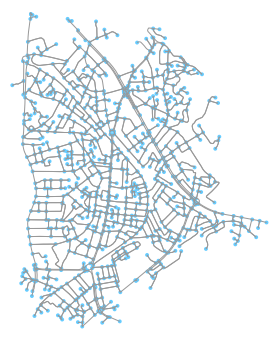

In \[31\]:

    #2. Analyzing Extended stats
    extended_stats = ox.extended_stats(G_simplified, bc = True, ecc= True,cc= True)

In \[32\]:

    node_max2, max_bcc2= max(extended_stats['betweenness_centrality'].items(),key=lambda x: x[1])
    node_max2, max_bcc2

Out\[32\]:

    (4883681202, 0.15897477557802905)

In \[33\]:

    G_simplified.remove_node(node_max2)

In \[34\]:

    stat2 = ox.basic_stats(G_simplified)

In \[35\]:

    stat2

Out\[35\]:

    {'n': 922,
     'm': 2157,
     'k_avg': 4.678958785249458,
     'intersection_count': 734,
     'streets_per_node_avg': 2.635574837310195,
     'streets_per_node_counts': {0: 0, 1: 188, 2: 17, 3: 660, 4: 57},
     'streets_per_node_proportion': {0: 0.0,
      1: 0.2039045553145336,
      2: 0.01843817787418655,
      3: 0.7158351409978309,
      4: 0.06182212581344902},
     'edge_length_total': 173672.4669999999,
     'edge_length_avg': 80.5157473342605,
     'street_length_total': 98510.55900000023,
     'street_length_avg': 81.07864938271624,
     'street_segments_count': 1215,
     'node_density_km': None,
     'intersection_density_km': None,
     'edge_density_km': None,
     'street_density_km': None,
     'circuity_avg': 1.2842089278889862e-05,
     'self_loop_proportion': 0.0004636068613815484,
     'clean_intersection_count': None,
     'clean_intersection_density_km': None}

In \[36\]:

    fig, ax = ox.plot_graph(G_simplified)

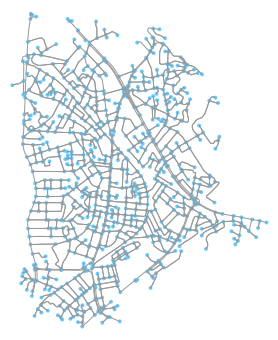

In \[37\]:

    while size.G_simplified!=G_simplified:
        node_max2= max(extended_stats['betweenness_centrality'].items(),key=lambda x: x[1])
        G_simplified.remove_node(node_max2)
        print(size.G_simplified)
        

    ---------------------------------------------------------------------------
    NameError                                 Traceback (most recent call last)
    <ipython-input-37-9c05d2986c08> in <module>()
    ----> 1 while size.G_simplified!=G_simplified:
          2     node_max2= max(extended_stats['betweenness_centrality'].items(),key=lambda x: x[1])
          3     G_simplified.remove_node(node_max2)
          4     print(size.G_simplified)
          5 

    NameError: name 'size' is not defined

In \[ \]:

    stats = ox.basic_stats(G_simplified,area =area_graph)

In \[ \]:

    stats

Based on the networks density analsysis above we understand that the
network is not that much connected. we can say the network is almost a
farmented network with a desnity of 0.000182

In \[ \]:

    H= G.to_undirected()

In \[ \]:

    # If your Graph has more than one component, this will return False:
    print(nx.is_connected(H))

In \[ \]:

    # Next, use nx.connected_components to get the list of components,
    # then use the max() command to find the largest one:
    components = nx.connected_components(H)
    largest_component = max(components, key=len)

In \[ \]:

    subgraph = H.subgraph(largest_component)
    diameter = nx.diameter(subgraph)
    print("Network diameter of largest component:", diameter)

In \[ \]:

    type(G2)

In \[ \]:

    nodes,edges= ox.graph_to_gdfs(G2)
    edges.plot(linewidth =1,edgecolor='#808080')

In \[ \]:

    edges,nodes.plot()

In \[ \]:

    nodes.head()

In \[ \]:

    type(nodes)

In \[ \]:

    fig,ax =plt.subplots()
    edges.plot(ax=ax,linewidth =1,edgecolor='#808080')
    ax.set_title('Simplified graph')
    ax.legend(loc='lower right',labels=['edges'])

# Calculating centrality metrics<a href="#Calculating-centrality-metrics" class="anchor-link">¶</a>

### Betweeness centrality<a href="#Betweeness-centrality" class="anchor-link">¶</a>

In \[ \]:

    # run betweeness centrality
    betweenness_dict = nx.betweenness_centrality(G2) # Run betweenness centrality

In \[ \]:

    sorted_betweenness = sorted(betweenness_dict.items(), reverse=True)

    print("Top 5 nodes by betweenness centrality:")
    for b in sorted_betweenness[:5]:
        print(b)

### Eigenvector centrality<a href="#Eigenvector-centrality" class="anchor-link">¶</a>

In \[ \]:

    eigenvector_dict = nx.eigenvector_centrality_numpy(G, weight=None, max_iter=1500, tol=0) # Run eigenvector centrality

In \[ \]:

    #eigenvector = str(eigenvector_dict)

In \[ \]:

    #eigenvector_sorted = sorted(eigenvector_dict.items(), reverse=True)

    print("Top 5 nodes by eigenvector centrality:")
    for b in eigenvector_dict:
        print(b)
    #print(slice(['{} {:0.2f}'.format(node, eigenvector_dict[node]) for node in eigenvector_dict])